In [1]:
'''
K-MEANS
'''
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
'''
MODELO
'''
from sklearn import cluster
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#CRIAR UM PANDA DATA FRAME
import pandas as pd
from collections import OrderedDict
import pickle

In [2]:
def salvaDataFrames_csv(dataFrame,caminhoSaida,nomeArquivo):
    dataFrame.to_csv(caminhoSaida+'\/'+nomeArquivo, sep=',', encoding = 'utf-8')
       
def salvaDataFrames_pkl(dataFrame,caminhoSaida,nomeArquivo):
    dataFrame.to_pickle(caminhoSaida+'\/'+nomeArquivo, compression='infer')
    
caminhoDataframe = 'C:\/Users\/Ricardinho\/Desktop\/notebooks_Data_Science\/DataFrames\/' 

def abreDataFrame(caminho,nomeArq):
    dataFrame = pd.read_pickle(caminho + nomeArq)#READ PICKLE MUITO IMPORTANTE!!!!!
    return dataFrame

dataFrame_SN = abreDataFrame(caminhoDataframe, 'Data_Frame_Ia_PCA_II.pkl')
dataFrame_SN.head(5)

,Nome_SN,SNx,SNy,Fase,Tipo,Tag_Fase,PCA_Px_1,PCA_Px_2,PCA_Py_1,PCA_Py_2,PCA_Vx_1,PCA_Vx_2,PCA_Vy_1,PCA_Vy_2
0,"[3657.8171091445433, 3661.5775067102504, 3665....",SN_Redshifted_sn1998V-19980319.flm,"[0.5984432965698894, 0.5905492293635906, 0.579...",Ia,-1.890,Maximo,-6458.880203,-655.708442,-0.444330,0.048064,-6280.719189,-396.874182,-0.241119,0.373996
1,"[3657.8171091445433, 3661.5775067102504, 3665....",SN_Redshifted_sn1998V-19980320.flm,"[0.637192333491651, 0.6141274942884631, 0.5960...",Ia,-1.890,Maximo,-2137.843934,3937.730133,-0.275439,0.112216,1117.916273,4786.035451,-0.069201,0.484576
2,"[3657.8171091445433, 3661.546502254467, 3665.2...",SN_Redshifted_sn1998V-19980321.flm,"[0.6570335303026084, 0.6753503669909301, 0.673...",Ia,-0.956,Maximo,-4579.883496,2143.853840,-0.423004,0.239782,-4128.202144,2893.456010,-0.306284,0.584218
3,"[3529.746655280387, 3533.3753907622395, 3537.0...",SN_Redshifted_sn1998dx-19980914.flm,"[0.9510331445835957, 0.8747050414260726, 0.822...",Ia,-0.435,Maximo,3484.079226,4660.968715,-0.412396,0.413321,3706.066803,4403.288461,-0.213103,0.403622
4,"[3529.746655280387, 3533.3753907622395, 3537.0...",SN_Redshifted_sn1998dx-19980915.flm,"[0.9336562914191868, 0.8202276475798798, 0.749...",Ia,-0.435,Maximo,3294.567153,4491.130143,-0.331301,0.292613,6098.139925,2879.216191,-0.138856,0.308748


In [3]:
#mudar os rotulos com nomes para numeros inteiros
#ROTULANDO COM VALORES PARA O MACHINE_LEARNING
def machine_learning_tag(dataframe):
    
    nome_valor = []
    print(dataframe.loc[0,'Tag_Fase'])
    for i in range(len(dataframe.index)):
        if(dataframe.loc[i,'Tag_Fase'] == 'Inicial'):
            valor = 1
            nome_valor.append(valor)
        elif(dataframe.loc[i,'Tag_Fase'] == 'Pre_Maximo' ):
            valor = 2
            nome_valor.append(valor)
        elif(dataframe.loc[i,'Tag_Fase'] == 'Maximo'):
            valor = 3
            nome_valor.append(valor)
        elif(dataframe.loc[i,'Tag_Fase'] == 'Pos_Maximo'):
            valor = 4
            nome_valor.append(valor)
        elif(dataframe.loc[i,'Tag_Fase'] == 'Pre_Nebular' ):
            valor = 5
            nome_valor.append(valor)
        elif(dataframe.loc[i,'Tag_Fase'] == 'Nebular' ):
            valor = 6
            nome_valor.append(valor)
        else:
            nome_valor.append(0)
                
    dataframe['Tag_valor'] = nome_valor     
    
    return nome_valor

In [4]:
X = dataFrame_SN[['PCA_Px_1','PCA_Px_2','PCA_Py_1','PCA_Py_2','PCA_Vx_1','PCA_Vx_2','PCA_Vy_1','PCA_Vy_2']]

X = np.asarray(X)
#labels
#y = machine_learning_tag(dataframe=dataFrame_SN)
y = dataFrame_SN[['Tag_Fase']]
'''
DIVIDE OS CONJUNTOS DE TREINAMENTO E DE TESTE
'''
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=33,
)


Text(0.5,1,'K=6, J=28843211750.44')

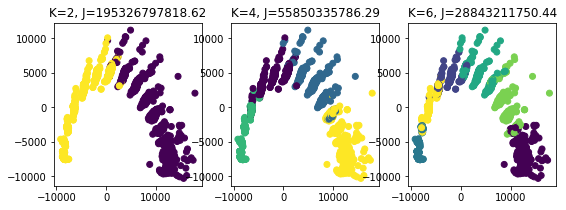

In [5]:
'''
CLUSTERING: 2,4,6
'''
km2 = cluster.KMeans(n_clusters=2).fit(X)
km4 = cluster.KMeans(n_clusters=4).fit(X)
km6 = cluster.KMeans(n_clusters=6).fit(X)

plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=km2.labels_)
plt.title("K=2, J=%.2f" % km2.inertia_)
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=km4.labels_)
plt.title("K=4, J=%.2f" % km4.inertia_)
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=km6.labels_)#.astype(np.float))
plt.title("K=6, J=%.2f" % km6.inertia_)

## Verificando o outro DataFrame

In [6]:
dataFrame_PCA_XY = abreDataFrame(caminhoDataframe, 'Data_Frame_Ia_PCA_XY.pkl')
dataFrame_PCA_XY.head(5)

,Nome_SN,SNx,SNy,Fase,Tipo,Tag_Fase,PCA_SNx_1,PCA_SNx_2,PCA_SNx_3,PCA_SNx_4,PCA_SNy_1,PCA_SNy_2,PCA_SNy_3,PCA_SNy_4
0,SN_Redshifted_sn1998V-19980319.flm,"[3657.8171091445433, 3661.5775067102504, 3665....","[0.5984432965698894, 0.5905492293635906, 0.579...",-1.890,Ia,Maximo,1067.728793,1559.146097,7.407957e-10,8.094121e-13,-3.989887,-1.327662,-1.906058,1.198017
1,SN_Redshifted_sn1998V-19980320.flm,"[3657.8171091445433, 3661.5775067102504, 3665....","[0.637192333491651, 0.6141274942884631, 0.5960...",-1.890,Ia,Maximo,1067.728793,1559.146097,7.468985e-10,-7.022874e-13,-4.102365,-1.263241,-1.900481,1.228636
2,SN_Redshifted_sn1998V-19980321.flm,"[3657.8171091445433, 3661.546502254467, 3665.2...","[0.6570335303026084, 0.6753503669909301, 0.673...",-0.956,Ia,Maximo,503.000753,1591.195877,7.455253e-10,-6.996419e-13,-3.939491,-1.560221,-2.191264,0.987668
3,SN_Redshifted_sn1998dx-19980914.flm,"[3529.746655280387, 3533.3753907622395, 3537.0...","[0.9510331445835957, 0.8747050414260726, 0.822...",-0.435,Ia,Maximo,-4946.086051,-129.305816,7.447813e-10,-2.083404e-13,-4.463030,-1.872636,1.136015,0.552185
4,SN_Redshifted_sn1998dx-19980915.flm,"[3529.746655280387, 3533.3753907622395, 3537.0...","[0.9336562914191868, 0.8202276475798798, 0.749...",-0.435,Ia,Maximo,-4946.086051,-129.305816,7.447813e-10,-2.083404e-13,-3.999763,-0.583957,1.597298,0.534887


In [7]:
X = dataFrame_PCA_XY[['PCA_SNx_1', 'PCA_SNx_2','PCA_SNx_3', 'PCA_SNx_4','PCA_SNy_1', 'PCA_SNy_2','PCA_SNy_3', 'PCA_SNy_4']]

X = np.asarray(X)
#labels
#y = machine_learning_tag(dataframe=dataFrame_SN)
y = dataFrame_PCA_XY[['Tag_Fase']]
'''
DIVIDE OS CONJUNTOS DE TREINAMENTO E DE TESTE
'''
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=33,
)

Text(0.5,1,'K=6, J=23013938482.73')

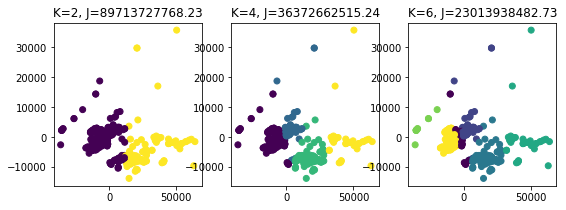

In [8]:
'''
CLUSTERING: 2,4,6
'''
km2 = cluster.KMeans(n_clusters=2).fit(X)
km4 = cluster.KMeans(n_clusters=4).fit(X)
km6 = cluster.KMeans(n_clusters=6).fit(X)

plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=km2.labels_)
plt.title("K=2, J=%.2f" % km2.inertia_)
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=km4.labels_)
plt.title("K=4, J=%.2f" % km4.inertia_)
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=km6.labels_)#.astype(np.float))
plt.title("K=6, J=%.2f" % km6.inertia_)

In [9]:
# SALVANDO O MODELO
filename1 = 'modelo_K_2_Filtrado.sav'
pickle.dump(km2, open(filename1, 'wb'))

filename2 = 'modelo_K_4_Filtrado.sav'
pickle.dump(km4, open(filename2, 'wb'))
 
filename3 = 'modelo_K_6_Filtrado.sav'
pickle.dump(km6, open(filename3, 'wb'))


In [10]:
carrega_modelo = pickle.load(open('modelo_K_6_Filtrado.sav', 'rb'))

In [11]:
clusters = carrega_modelo.labels_

In [15]:
def gerandoFeatures_DataFrame_Kmeans(dataFrame_SN,feature):
    
    '''
    dados basicos que sempre ficam no dataframe
    '''
    data1 = dataFrame_SN.loc[:,'SNx']
    data1 = data1.tolist()
    
    data2 = dataFrame_SN.loc[:,'SNy']
    data2 = data2.tolist()
    
    data3 = dataFrame_SN.loc[:,'Nome_SN']
    data3 = data3.tolist()
    
    data4 = dataFrame_SN.loc[:,'Tipo']
    data4 = data4.tolist()
    
    data5 = dataFrame_SN.loc[:,'Fase']
    data5 = data5.tolist()
    
    data6 = dataFrame_SN.loc[:,'Tag_Fase']
    data6 = data6.tolist()
    
    #gera o 1st data frame
    dataFrameFeatures = OrderedDict(
    {
     'Nome_SN':data3,
     'SNx':data1,
     'SNy':data2,
     'Fase':data5,
     'Tipo':data4,
     'Tag_Fase':data6
     })
    df = pd.DataFrame(dataFrameFeatures)
    #print(feature)
    
    feature = pd.DataFrame(feature, columns = ['Clusters-Kmeans'])
   
    dataFrame_Final = pd.concat([df,feature],axis = 1)
    
    return dataFrame_Final

In [16]:
dataFrame_kmeans = gerandoFeatures_DataFrame_Kmeans(dataFrame_SN,clusters)

salvaDataFrames_csv(dataFrame_kmeans,caminhoDataframe,'Data_Frame_Ia_Kmeans.csv')
salvaDataFrames_pkl(dataFrame_kmeans,caminhoDataframe,'Data_Frame_Ia_Kmeans.pkl')

In [17]:
dataFrame_kmeans.head(5)

,Nome_SN,SNx,SNy,Fase,Tipo,Tag_Fase,Clusters-Kmeans
0,"[3657.8171091445433, 3661.5775067102504, 3665....",SN_Redshifted_sn1998V-19980319.flm,"[0.5984432965698894, 0.5905492293635906, 0.579...",Ia,-1.890,Maximo,1
1,"[3657.8171091445433, 3661.5775067102504, 3665....",SN_Redshifted_sn1998V-19980320.flm,"[0.637192333491651, 0.6141274942884631, 0.5960...",Ia,-1.890,Maximo,1
2,"[3657.8171091445433, 3661.546502254467, 3665.2...",SN_Redshifted_sn1998V-19980321.flm,"[0.6570335303026084, 0.6753503669909301, 0.673...",Ia,-0.956,Maximo,1
3,"[3529.746655280387, 3533.3753907622395, 3537.0...",SN_Redshifted_sn1998dx-19980914.flm,"[0.9510331445835957, 0.8747050414260726, 0.822...",Ia,-0.435,Maximo,0
4,"[3529.746655280387, 3533.3753907622395, 3537.0...",SN_Redshifted_sn1998dx-19980915.flm,"[0.9336562914191868, 0.8202276475798798, 0.749...",Ia,-0.435,Maximo,0


In [30]:
dataCluster_A = 0
for i in range(len(dataFrame_kmeans.index)):
    if(dataFrame_kmeans.loc[i,'Clusters-Kmeans'] == 0):
        dataClusterA = dataFrame_kmeans[['Nome_SN', 'SNx','SNy','Fase','Tag_Fase']]
        
dataClusterA


,Nome_SN,SNx,SNy,Fase,Tag_Fase
0,"[3657.8171091445433, 3661.5775067102504, 3665....",SN_Redshifted_sn1998V-19980319.flm,"[0.5984432965698894, 0.5905492293635906, 0.579...",Ia,Maximo
1,"[3657.8171091445433, 3661.5775067102504, 3665....",SN_Redshifted_sn1998V-19980320.flm,"[0.637192333491651, 0.6141274942884631, 0.5960...",Ia,Maximo
2,"[3657.8171091445433, 3661.546502254467, 3665.2...",SN_Redshifted_sn1998V-19980321.flm,"[0.6570335303026084, 0.6753503669909301, 0.673...",Ia,Maximo
3,"[3529.746655280387, 3533.3753907622395, 3537.0...",SN_Redshifted_sn1998dx-19980914.flm,"[0.9510331445835957, 0.8747050414260726, 0.822...",Ia,Maximo
4,"[3529.746655280387, 3533.3753907622395, 3537.0...",SN_Redshifted_sn1998dx-19980915.flm,"[0.9336562914191868, 0.8202276475798798, 0.749...",Ia,Maximo
5,"[3529.746655280387, 3533.3753907622395, 3537.0...",SN_Redshifted_sn1998dx-19980917.flm,"[0.495615778559792, 0.6598588802703995, 0.7312...",Ia,Maximo
6,"[3529.746655280387, 3533.3753907622395, 3537.0...",SN_Redshifted_sn1998dx-19980918.flm,"[0.5954063726305847, 0.6035925242893051, 0.619...",Ia,Maximo
7,"[3633.8771124352834, 3637.5351614191113, 3641....",SN_Redshifted_sn1998eg-19981024.flm,"[0.7056902332673677, 0.7067640677233571, 0.703...",Ia,Maximo
8,"[3664.302600472813, 3668.0696654100907, 3671.8...",SN_Redshifted_sn1999aa-19990223.flm,"[0.6565047016974757, 0.6178832114473997, 0.588...",Ia,Maximo
9,"[3606.048856145793, 3609.7560336606475, 3613.4...",SN_Redshifted_sn1999cc-19990516.flm,"[0.5235316459774078, 0.49047822011456255, 0.47...",Ia,Maximo
